In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import re
from bs4 import BeautifulSoup # For scraping table from web 

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# !conda install -c conda-forge geocoder --yes 
import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import matplotlib.cm as cm # color mapper

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


**Get London coordinate**

In [3]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
ld_latitude = location.latitude
ld_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(ld_latitude, ld_longitude))

The geograpical coordinate of Toronto are 51.5073219, -0.1276474.


<h1>Foursquare Authentication</h1>

In [4]:
CLIENT_ID = 'WD4ZCT2AXCER1SL3WPCVPJOC45434AGAPRLWMROEVRXDKDQQ' # your Foursquare ID
CLIENT_SECRET = '4NLO13KRPOWNET5DYDE5K2NFMC3UQCF52RVUQ2YX22XS5DGE' # your Foursquare Secret
VERSION = '20190909'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WD4ZCT2AXCER1SL3WPCVPJOC45434AGAPRLWMROEVRXDKDQQ
CLIENT_SECRET:4NLO13KRPOWNET5DYDE5K2NFMC3UQCF52RVUQ2YX22XS5DGE


<h1>Scraping London Universities Information From Wikipedia</h1>

In [5]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_universities_and_higher_education_colleges_in_London').text
soup = BeautifulSoup(website_url,'lxml')
w_table = soup.find('table',{'class':'wikitable sortable'})
list_contents = [re.split('\n+', rl.getText().strip()) for rl in w_table.findAll('tr')]
data = pd.DataFrame(list_contents)
columns = data.iloc[0]
data = data[1:]
data.columns = columns
univer_df = data.iloc[:,[0]]
univer_df
# print(soup.prettify())

,University
1,"Birkbeck, University of London"
2,Brunel University London
3,"City, University of London"
4,"Goldsmiths, University of London"
5,Imperial College London
6,King's College London
7,Kingston University
8,London Metropolitan University
9,London School of Economics
10,London South Bank University


<h2>Extract Universities Coordinate</h2>

In [6]:
def get_coord(univer):
    univer = univer['University']
    address = '{}, London, United Kingdom'.format(univer.replace(',', ''))
    # initialize your variable to None
    location = None
    # loop until you get the coordinates
    geolocator = Nominatim(user_agent="London_explorer")
    location = geolocator.geocode(address)
    if not location is None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = 0
        longitude = 0
        
    print('{}\t{}\t{}'.format(latitude, longitude, univer))
    return [latitude, longitude]

In [7]:
univer_df.loc[:,'coordi'] = univer_df.loc[:,['University']].apply(get_coord, axis=1)
univer_df.loc[:,'Latitude'] = univer_df.loc[:,'coordi'].str.get(0)
univer_df.loc[:,'Longitude'] = univer_df.loc[:,'coordi'].str.get(1)
univer_df.reset_index(inplace=True)
univer_df.drop('coordi', axis=1, inplace=True)
univer_df.drop('index', axis=1, inplace=True)
univer_df.head()

51.5217668	-0.130190717056655	Birkbeck, University of London
51.53255315	-0.473993562050575	Brunel University London
51.52767845	-0.10348336610602	City, University of London
51.47403955	-0.0393492813292085	Goldsmiths, University of London
51.49887085	-0.175607955839404	Imperial College London
51.4698444	-0.0892785984924762	King's College London
51.4032656	-0.3044647	Kingston University
51.5484391	-0.106033785310014	London Metropolitan University
51.51442905	-0.116588403365376	London School of Economics
51.497788	-0.101859261561486	London South Bank University
51.59029705	-0.229632209454029	Middlesex University
51.5247272	-0.0393103466301624	Queen Mary University of London
51.5016671	0.00573774782309864	Ravensbourne University London
0	0	Royal Holloway, University of London
51.52207465	-0.128926171526777	SOAS, University of London
51.4276362	-0.1750439	St George's, University of London
51.43620475	-0.334175339610712	St Mary's University, Twickenham
51.5231607	-0.1282037	University Colle

/Users/utt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/utt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/utt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,University,Latitude,Longitude
0,"Birkbeck, University of London",51.521767,-0.130191
1,Brunel University London,51.532553,-0.473994
2,"City, University of London",51.527678,-0.103483
3,"Goldsmiths, University of London",51.474040,-0.039349
4,Imperial College London,51.498871,-0.175608


<h2>Check if there is any missing coordinate and fill it up.</h2>

In [8]:
univer_df.loc[13, 'Latitude'], univer_df.loc[13, 'Longitude'] = 51.5184204,-0.1308916
univer_df.loc[20, 'Latitude'], univer_df.loc[20, 'Longitude'] = 51.4579899,-0.2454756
univer_df

,University,Latitude,Longitude
0,"Birkbeck, University of London",51.521767,-0.130191
1,Brunel University London,51.532553,-0.473994
2,"City, University of London",51.527678,-0.103483
3,"Goldsmiths, University of London",51.474040,-0.039349
4,Imperial College London,51.498871,-0.175608
5,King's College London,51.469844,-0.089279
6,Kingston University,51.403266,-0.304465
7,London Metropolitan University,51.548439,-0.106034
8,London School of Economics,51.514429,-0.116588
9,London South Bank University,51.497788,-0.101859


Visualize universities in London

In [29]:
# create map of Bangkok using latitude and longitude values
map_london = folium.Map(location=[ld_latitude, ld_longitude], zoom_start=10, tiles='Stamen Toner')

# add markers to map
for lat, lng, univer in zip(univer_df['Latitude'].astype(float)
                            ,univer_df['Longitude'].astype(float)
                            ,univer_df['University']
                            ):
    label = '{}'.format(univer)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        popup=label,
        color='blue',
        weight=0.25,
        fill=True,
        fill_color='blue',
        fill_opacity=0.9,
        parse_html=False).add_to(map_london)
map_london.save('map_london.html')

# Crime exploration

## Import London crime records [2014 - 2017] (Kaggle dataset)

In [10]:
kaggle_crime = pd.read_csv(r'/Users/Utt/Documents/Work/IBM Data Science Course/The-Battle-of-Neighborhoods/data/london-police-records/london-street.csv')
kaggle_crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
4,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


### Let's create function to measure distance between two points on the earth

In [11]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

Function to check crime activities around each university

In [12]:
def check_crime_in_univer_area(row):
    radius = 1
    for index, univer_info in univer_df.iterrows():
        if haversine(univer_info['Longitude'],univer_info['Latitude'],row['Longitude'],row['Latitude']) <= radius:
            return univer_info['University']
    return np.NaN

Prepare crime records from kaggle dataset

In [13]:
crime_records = kaggle_crime.loc[:,['Crime type', 'Latitude', 'Longitude', 'Month']]
crime_records = crime_records.loc[crime_records['Month'].str.contains('201[4567]', regex=True)]
crime_records = crime_records.loc[crime_records['Latitude'].notnull() & crime_records['Longitude'].notnull()]
crime_records.head()

,Crime type,Latitude,Longitude,Month
0,Vehicle crime,51.517372,-0.113767,2014-06
1,Violence and sexual offences,51.518226,-0.111497,2014-06
2,Anti-social behaviour,51.520699,-0.097601,2014-06
3,Anti-social behaviour,51.520699,-0.097601,2014-06
4,Anti-social behaviour,51.520699,-0.097601,2014-06


Find crime activities around each university

In [14]:
crime_in_univer_area = crime_records.copy()
crime_in_univer_area['University'] = crime_records.loc[:,['Latitude', 'Longitude']].apply(check_crime_in_univer_area, axis=1)
crime_in_univer_area = crime_in_univer_area.loc[crime_in_univer_area['University'].notnull()]
crime_in_univer_area.head()

,Crime type,Latitude,Longitude,Month,University
0,Vehicle crime,51.517372,-0.113767,2014-06,London School of Economics
1,Violence and sexual offences,51.518226,-0.111497,2014-06,London School of Economics
2,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"
3,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"
4,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
def draw_barchart(df, xcol, ycol, title):
    fig = plt.figure(figsize=(15,5))
    s=sns.barplot(x=xcol, y=ycol, data=df)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.title(title, fontsize=15)
    plt.xlabel(xcol, fontsize=15)
    plt.ylabel ("Frequency", fontsize=15)
    plt.savefig(title+".png", dpi=300, bbox_inches = 'tight')
    plt.show()

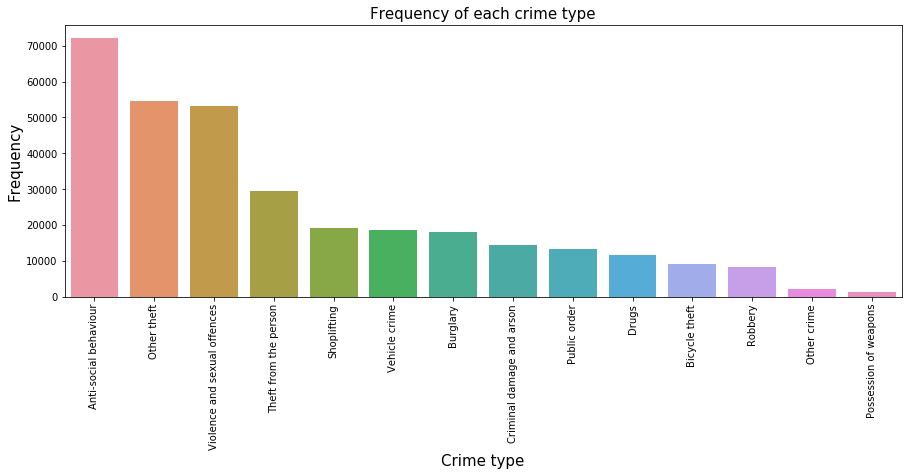

In [39]:
draw_barchart(crime_in_univer_area.groupby('Crime type').size().sort_values(ascending=False).reset_index(),'Crime type', 0, 'Frequency of each crime type')

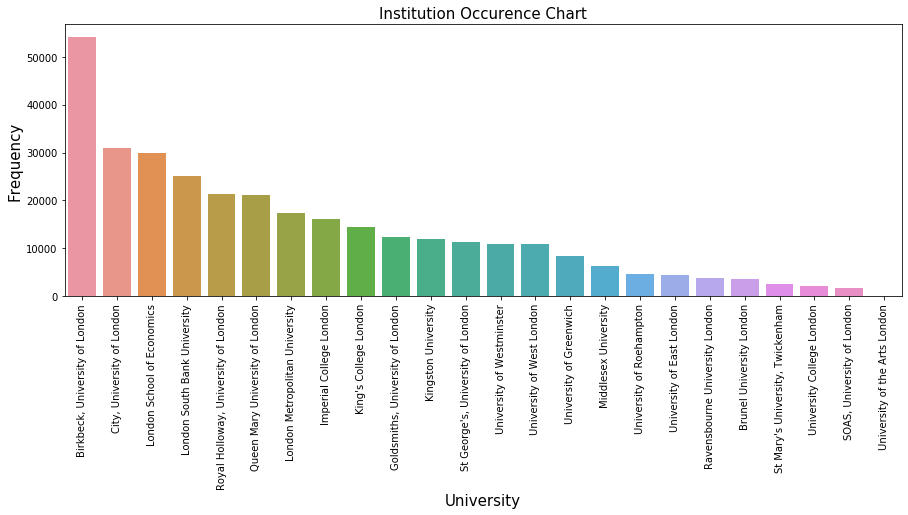

In [40]:
draw_barchart(crime_in_univer_area.groupby('University').size().sort_values(ascending=False).reset_index(),'University', 0, 'Institution Occurence Chart')

In [18]:
top_5_crime = crime_in_univer_area.groupby('Crime type').size().sort_values(ascending=False).head().index.to_list()
top_5_institut = crime_in_univer_area.groupby('University').size().sort_values(ascending=False).head().index.to_list()
top_5_institut

['Birkbeck, University of London',
 'City, University of London',
 'London School of Economics',
 'London South Bank University',
 'Royal Holloway, University of London']

In [26]:
top_5_institut_crime_rec = crime_in_univer_area.loc[crime_in_univer_area['University'].isin(top_5_institut) & crime_in_univer_area['Crime type'].isin(top_5_crime)]
top_5_institut_crime_rec
# crime_in_univer_area['University'] = 'top_5_institut'

,Crime type,Latitude,Longitude,Month,University
1,Violence and sexual offences,51.518226,-0.111497,2014-06,London School of Economics
2,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"
3,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"
4,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"
6,Anti-social behaviour,51.521145,-0.097409,2014-06,"City, University of London"
7,Anti-social behaviour,51.520699,-0.097601,2014-06,"City, University of London"
10,Other theft,51.520699,-0.097601,2014-06,"City, University of London"
12,Other theft,51.521567,-0.097334,2014-06,"City, University of London"
14,Other theft,51.520699,-0.097601,2014-06,"City, University of London"
16,Theft from the person,51.520699,-0.097601,2014-06,"City, University of London"


Crime type,Anti-social behaviour,Other theft,Shoplifting,Theft from the person,Violence and sexual offences
University,,,,,
"Birkbeck, University of London",10800,13405,3003,7600,6220
"City, University of London",5666,4652,1874,4677,4424
London School of Economics,7101,6924,1887,3597,4055
London South Bank University,5992,3745,825,1616,4436
"Royal Holloway, University of London",2990,5890,1843,3900,2772


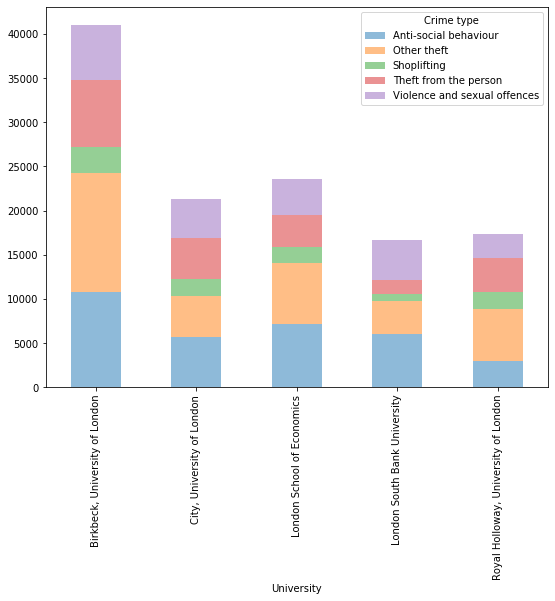

In [45]:
top_5_institut_crime_rec_grp = top_5_institut_crime_rec.groupby(['University', 'Crime type'])['University'].count().unstack('Crime type').fillna(0)
top_5_institut_crime_rec_grp.plot(kind='bar', stacked=True,  figsize=(9, 7), alpha=0.5,)
plt.savefig('top-5-crimes-figure.png', dpi=300, bbox_inches = 'tight')
top_5_institut_crime_rec_grp

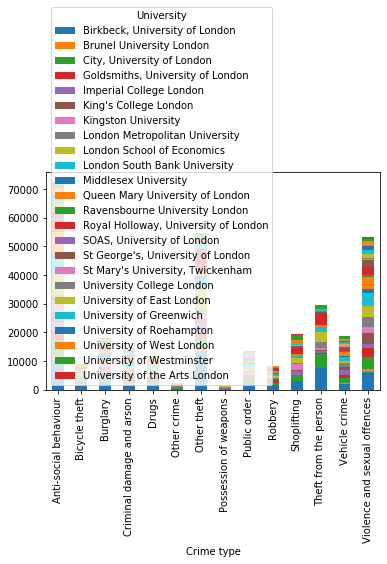

In [74]:
df2 = crime_in_univer_area.groupby(['Crime type', 'University'])['Crime type'].count().unstack('University').fillna(0)
df2.plot(kind='bar', stacked=True)

Let's visualize crime activities map

In [118]:
# create map of London using latitude and longitude values
crime_map = folium.Map(location=[ld_latitude, ld_longitude], zoom_start=11, tiles='Stamen Toner')

i=0
# add markers to map
for lat, lng, ctype in zip(crime_in_univer_area['Latitude'].astype(float)
                            ,crime_in_univer_area['Longitude'].astype(float)
                            ,crime_in_univer_area['Crime type']
                        ):
#     i = i + 1
#     if i % 1000 == 0:
#         print(i, end='\r')
    label = '{}'.format(ctype)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        weight=0.5,
        fill=True,
        fill_color='red',
        fill_opacity=0.9,
        parse_html=False).add_to(crime_map)
for lat, lng, univer in zip(univer_df['Latitude'].astype(float)
                        ,univer_df['Longitude'].astype(float)
                        ,univer_df['University']
                        ):
    label = '{}'.format(univer)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        weight=0.5,
        fill=True,
        fill_color='blue',
        fill_opacity=0.9,
        parse_html=False).add_to(crime_map)
crime_map.save('ucrime.html')

## Analyze crime activities around each University

In [293]:
# one hot encoding
univer_crime_onehot = pd.get_dummies(crime_in_univer_area[['Crime type']], prefix="", prefix_sep="")

# add University column back to dataframe
univer_crime_onehot['University'] = crime_in_univer_area['University']

# move University column to the first column
fixed_columns = [univer_crime_onehot.columns[-1]] + list(univer_crime_onehot.columns[:-1])
univer_crime_onehot = univer_crime_onehot[fixed_columns]
univer_crime_onehot.head()

,University,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,London School of Economics,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,London School of Economics,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"City, University of London",1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"City, University of London",1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"City, University of London",1,0,0,0,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by university and by taking the mean of the frequency of occurrence of each crime type

In [297]:
univer_crime_group = univer_crime_onehot.groupby('University').mean()
univer_crime_group.head()

,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
University,,,,,,,,,,,,,,
"Birkbeck, University of London",0.199804,0.031155,0.051468,0.027399,0.024679,0.004773,0.247997,0.002572,0.034318,0.028528,0.055557,0.140603,0.036076,0.115072
Brunel University London,0.273164,0.027966,0.094915,0.082768,0.036158,0.007627,0.080791,0.003390,0.045480,0.011582,0.013559,0.011017,0.085028,0.226554
"City, University of London",0.183028,0.037084,0.058920,0.044126,0.036115,0.006234,0.150273,0.003295,0.044255,0.027134,0.060536,0.151081,0.055012,0.142908
"Goldsmiths, University of London",0.241485,0.013657,0.063625,0.072060,0.050129,0.007551,0.088287,0.005784,0.042818,0.034785,0.024904,0.032294,0.082343,0.240280
Imperial College London,0.197968,0.026990,0.064639,0.025307,0.035093,0.009412,0.244655,0.004800,0.029920,0.015583,0.082965,0.056349,0.105030,0.101290


## Let's create ranking function

In [295]:
def ranking(row):
    return list(row.sort_values(ascending=False).head(10).index)

Create ranked crime DataFrame for each university

In [298]:
univer_crime_ranked = univer_crime_group.apply(ranking, axis=1)
univer_crime_ranked = pd.DataFrame(univer_crime_ranked.values.tolist(), index=univer_crime_ranked.index)
univer_crime_ranked.head()

,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,
"Birkbeck, University of London",Other theft,Anti-social behaviour,Theft from the person,Violence and sexual offences,Shoplifting,Burglary,Vehicle crime,Public order,Bicycle theft,Robbery
Brunel University London,Anti-social behaviour,Violence and sexual offences,Burglary,Vehicle crime,Criminal damage and arson,Other theft,Public order,Drugs,Bicycle theft,Shoplifting
"City, University of London",Anti-social behaviour,Theft from the person,Other theft,Violence and sexual offences,Shoplifting,Burglary,Vehicle crime,Public order,Criminal damage and arson,Bicycle theft
"Goldsmiths, University of London",Anti-social behaviour,Violence and sexual offences,Other theft,Vehicle crime,Criminal damage and arson,Burglary,Drugs,Public order,Robbery,Theft from the person
Imperial College London,Other theft,Anti-social behaviour,Vehicle crime,Violence and sexual offences,Shoplifting,Burglary,Theft from the person,Drugs,Public order,Bicycle theft


In [143]:
def draw_sorted_barchart(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df_plot = df.loc[:,[var_name]].sort_values(var_name, ascending=False).head(5)
        df_plot.plot(kind='bar', ax=ax, figsize=(10, 40), legend=False)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

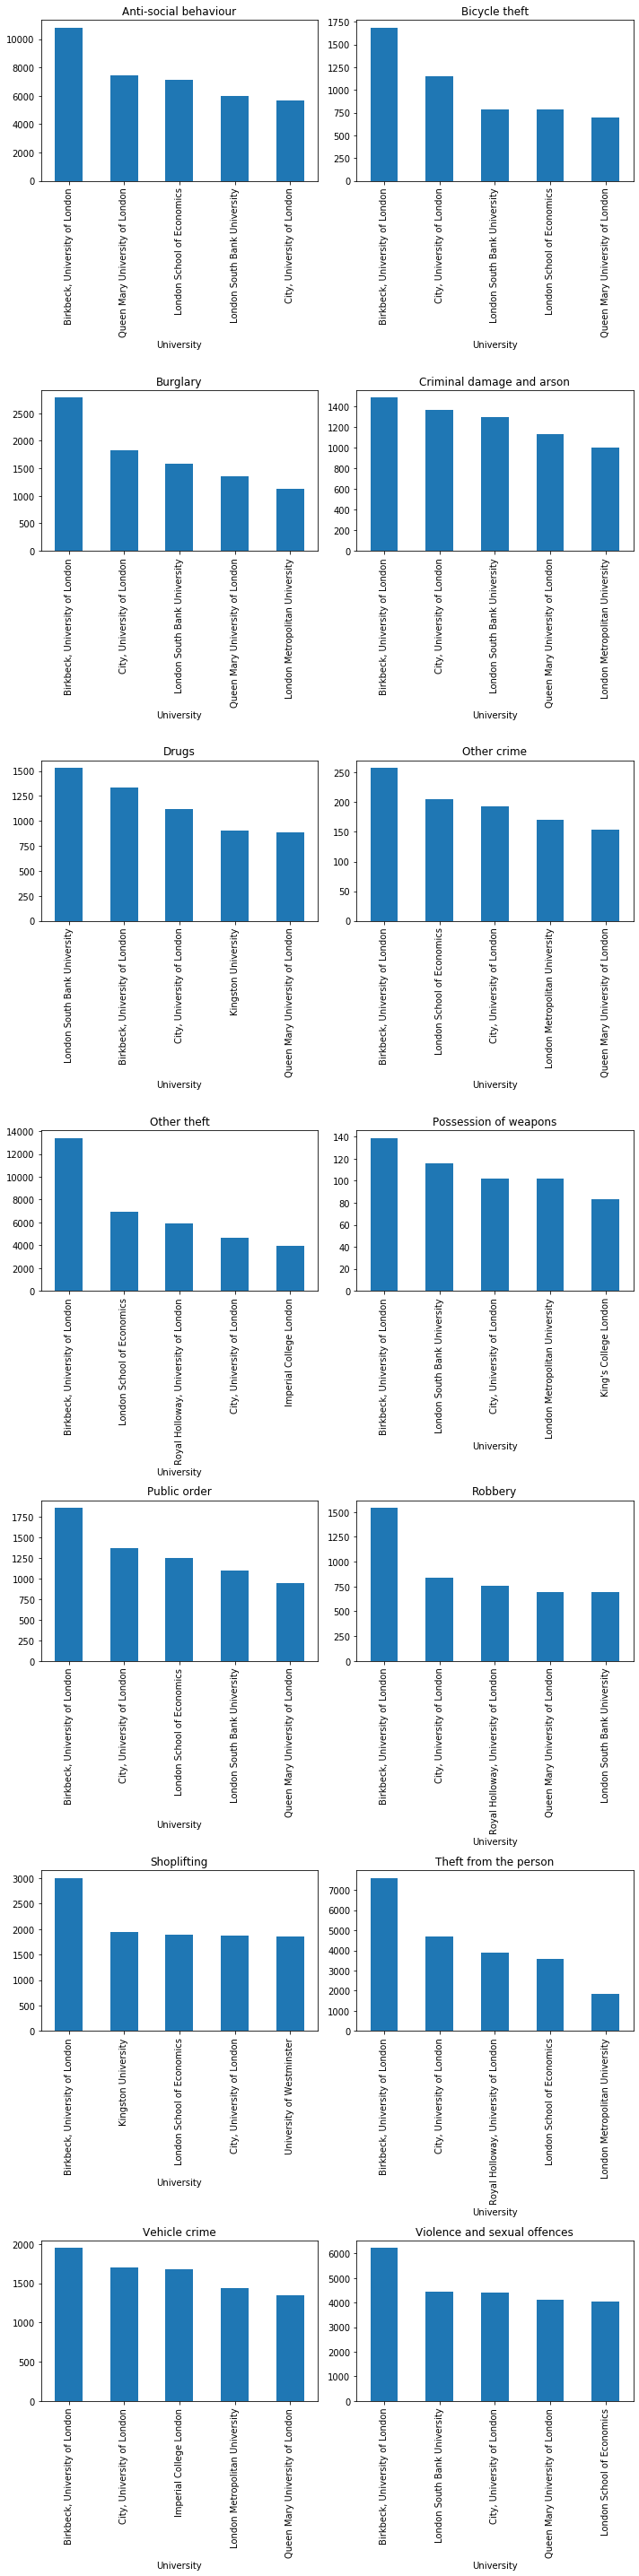

In [144]:
draw_sorted_barchart(univer_crime_group, univer_crime_group.columns, 7, 2)

# Venues exploration

In [145]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT = 9999
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print("--- Failed to extract items ---")
            continue
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['University', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [146]:
univer_venues = getNearbyVenues(univer_df['University'], univer_df['Latitude'], univer_df['Longitude'])
univer_venues.head()

Birkbeck, University of London
Brunel University London
City, University of London
Goldsmiths, University of London
Imperial College London
King's College London
Kingston University
London Metropolitan University
London School of Economics
London South Bank University
Middlesex University
Queen Mary University of London
Ravensbourne University London
Royal Holloway, University of London
SOAS, University of London
St George's, University of London
St Mary's University, Twickenham
University College London
University of East London
University of Greenwich
University of Roehampton
University of the Arts London
University of West London
University of Westminster


,University,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Birkbeck, University of London",51.521767,-0.130191,Waterstones,51.522582,-0.132426,Bookstore
1,"Birkbeck, University of London",51.521767,-0.130191,Store Street Espresso,51.520233,-0.130824,Coffee Shop
2,"Birkbeck, University of London",51.521767,-0.130191,Lever & Bloom Coffee,51.523334,-0.131076,Coffee Shop
3,"Birkbeck, University of London",51.521767,-0.130191,Asia Room,51.520158,-0.127665,Exhibit
4,"Birkbeck, University of London",51.521767,-0.130191,The Egyptian Exhibition,51.519599,-0.127894,Exhibit


In [147]:
# create map of London using latitude and longitude values
venue_map = folium.Map(location=[ld_latitude, ld_longitude], zoom_start=11, tiles='Stamen Toner')

# add markers to map
for lat, lng, vcat in zip(univer_venues['Venue Latitude'].astype(float)
                            ,univer_venues['Venue Longitude'].astype(float)
                            ,univer_venues['Venue Category']
                        ):
    label = '{}'.format(vcat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='green',
        weight=0.5,
        fill=True,
        fill_color='green',
        fill_opacity=0.9,
        parse_html=False).add_to(venue_map)
for lat, lng, univer in zip(univer_df['Latitude'].astype(float)
                        ,univer_df['Longitude'].astype(float)
                        ,univer_df['University']
                        ):
    label = '{}'.format(univer)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        weight=0.5,
        fill=True,
        fill_color='blue',
        fill_opacity=0.9,
        parse_html=False).add_to(venue_map)
venue_map.save('uvenue.html')

In [148]:
len(pd.unique(univer_venues['Venue Category']))

248

In [299]:
univer_venues_onehot = pd.get_dummies(univer_venues[['Venue Category']], prefix="", prefix_sep="")
univer_venues_onehot.rename(columns={'University':'University Venue'}, inplace=True)
univer_venues_onehot['University'] = univer_venues['University']
fixed_columns = [univer_venues_onehot.columns[-1]] + list(univer_venues_onehot.columns[:-1])
univer_venues_onehot = univer_venues_onehot[fixed_columns]
univer_venues_onehot.head()

,University,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Birkbeck, University of London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Birkbeck, University of London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Birkbeck, University of London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Birkbeck, University of London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Birkbeck, University of London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
univer_venues_group = univer_venues_onehot.groupby('University').mean()
univer_venues_group.head()

,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
University,,,,,,,,,,,,,,,,,,,,,
"Birkbeck, University of London",0.01,0.01,0.0,0.0,0.000000,0.00,0.00,0.01,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.02,0.00,0.01,0.0,0.0,0.00
Brunel University London,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,0.00
"City, University of London",0.00,0.00,0.0,0.0,0.030000,0.00,0.02,0.00,0.0,0.0,...,0.010000,0.030000,0.0,0.000000,0.00,0.01,0.00,0.0,0.0,0.00
"Goldsmiths, University of London",0.00,0.00,0.0,0.0,0.014706,0.00,0.00,0.00,0.0,0.0,...,0.029412,0.014706,0.0,0.014706,0.00,0.00,0.00,0.0,0.0,0.00
Imperial College London,0.00,0.00,0.0,0.0,0.020000,0.01,0.00,0.00,0.0,0.0,...,0.000000,0.010000,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,0.01


In [301]:
univer_venues_ranked = univer_venues_group.apply(ranking, axis=1)
univer_venues_ranked = pd.DataFrame(univer_venues_ranked.values.tolist(), index=univer_venues_ranked.index)
univer_venues_ranked.head()

,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,
"Birkbeck, University of London",Coffee Shop,Hotel,Pizza Place,Café,Bookstore,Cocktail Bar,Exhibit,Turkish Restaurant,Beer Bar,Science Museum
Brunel University London,Pub,Coffee Shop,Nightclub,Chinese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Park,Hotel,Gym,Sandwich Place
"City, University of London",Pub,Coffee Shop,Hotel,Café,Food Truck,Art Gallery,Pizza Place,Vietnamese Restaurant,Sushi Restaurant,Gym / Fitness Center
"Goldsmiths, University of London",Pub,Café,Bus Stop,Coffee Shop,Grocery Store,Chinese Restaurant,Sandwich Place,Bar,Supermarket,Turkish Restaurant
Imperial College London,Café,Hotel,Exhibit,Science Museum,Garden,Italian Restaurant,Bakery,Restaurant,Burger Joint,Dessert Shop


In [277]:
univer_clustering = pd.concat([univer_venues_group, univer_crime_group], axis=1)
univer_clustering.head()

,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
University,,,,,,,,,,,,,,,,,,,,,
"Birkbeck, University of London",0.01,0.01,0.0,0.0,0.000000,0.00,0.00,0.01,0.0,0.0,...,0.024679,0.004773,0.247997,0.002572,0.034318,0.028528,0.055557,0.140603,0.036076,0.115072
Brunel University London,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,0.036158,0.007627,0.080791,0.003390,0.045480,0.011582,0.013559,0.011017,0.085028,0.226554
"City, University of London",0.00,0.00,0.0,0.0,0.030000,0.00,0.02,0.00,0.0,0.0,...,0.036115,0.006234,0.150273,0.003295,0.044255,0.027134,0.060536,0.151081,0.055012,0.142908
"Goldsmiths, University of London",0.00,0.00,0.0,0.0,0.014706,0.00,0.00,0.00,0.0,0.0,...,0.050129,0.007551,0.088287,0.005784,0.042818,0.034785,0.024904,0.032294,0.082343,0.240280
Imperial College London,0.00,0.00,0.0,0.0,0.020000,0.01,0.00,0.00,0.0,0.0,...,0.035093,0.009412,0.244655,0.004800,0.029920,0.015583,0.082965,0.056349,0.105030,0.101290


# Build k-mean clustering model

In [278]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(univer_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [280]:
# add clustering labels
univer_clustering['Cluster Labels'] = kmeans.labels_
univer_crime_ranked['Cluster Labels'] = kmeans.labels_
univer_venues_ranked['Cluster Labels'] = kmeans.labels_

# merge univer_clustering with univer_df to add latitude/longitude for each university
univer_merged = pd.concat([univer_clustering, univer_df.set_index('University')], axis=1, sort=True)

univer_merged.head() # check the last columns!

,Cluster Labels,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Latitude,Longitude
"Birkbeck, University of London",0,0.01,0.01,0.0,0.0,0.000000,0.00,0.00,0.01,0.0,...,0.247997,0.002572,0.034318,0.028528,0.055557,0.140603,0.036076,0.115072,51.521767,-0.130191
Brunel University London,1,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,...,0.080791,0.003390,0.045480,0.011582,0.013559,0.011017,0.085028,0.226554,51.532553,-0.473994
"City, University of London",0,0.00,0.00,0.0,0.0,0.030000,0.00,0.02,0.00,0.0,...,0.150273,0.003295,0.044255,0.027134,0.060536,0.151081,0.055012,0.142908,51.527678,-0.103483
"Goldsmiths, University of London",1,0.00,0.00,0.0,0.0,0.014706,0.00,0.00,0.00,0.0,...,0.088287,0.005784,0.042818,0.034785,0.024904,0.032294,0.082343,0.240280,51.474040,-0.039349
Imperial College London,0,0.00,0.00,0.0,0.0,0.020000,0.01,0.00,0.00,0.0,...,0.244655,0.004800,0.029920,0.015583,0.082965,0.056349,0.105030,0.101290,51.498871,-0.175608


# Visualize result

In [281]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[ld_latitude, ld_longitude], zoom_start=10, tiles='Stamen Toner')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(univer_merged['Latitude'], univer_merged['Longitude'], univer_merged.index, univer_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
#         radius=5,
        weight=0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 1

In [282]:
univer_crime_ranked.loc[univer_crime_ranked['Cluster Labels'] == 0]

,Cluster Labels,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,,
"Birkbeck, University of London",0,Other theft,Anti-social behaviour,Theft from the person,Violence and sexual offences,Shoplifting,Burglary,Vehicle crime,Public order,Bicycle theft,Robbery
"City, University of London",0,Anti-social behaviour,Theft from the person,Other theft,Violence and sexual offences,Shoplifting,Burglary,Vehicle crime,Public order,Criminal damage and arson,Bicycle theft
Imperial College London,0,Other theft,Anti-social behaviour,Vehicle crime,Violence and sexual offences,Shoplifting,Burglary,Theft from the person,Drugs,Public order,Bicycle theft
London School of Economics,0,Anti-social behaviour,Other theft,Violence and sexual offences,Theft from the person,Shoplifting,Public order,Burglary,Drugs,Criminal damage and arson,Bicycle theft
"Royal Holloway, University of London",0,Other theft,Theft from the person,Anti-social behaviour,Violence and sexual offences,Shoplifting,Robbery,Drugs,Public order,Burglary,Criminal damage and arson
"SOAS, University of London",0,Anti-social behaviour,Other theft,Theft from the person,Violence and sexual offences,Public order,Robbery,Vehicle crime,Criminal damage and arson,Bicycle theft,Drugs
University College London,0,Anti-social behaviour,Violence and sexual offences,Other theft,Theft from the person,Public order,Shoplifting,Burglary,Criminal damage and arson,Vehicle crime,Robbery
University of Westminster,0,Anti-social behaviour,Other theft,Shoplifting,Theft from the person,Violence and sexual offences,Vehicle crime,Burglary,Criminal damage and arson,Public order,Robbery
University of the Arts London,0,Other theft,Violence and sexual offences,Anti-social behaviour,Theft from the person,Drugs,Vehicle crime,Public order,Bicycle theft,Burglary,Shoplifting


In [283]:
univer_venues_ranked.loc[univer_venues_ranked['Cluster Labels'] == 0]

,Cluster Labels,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,,
"Birkbeck, University of London",0,Coffee Shop,Hotel,Pizza Place,Café,Bookstore,Cocktail Bar,Exhibit,Turkish Restaurant,Beer Bar,Science Museum
"City, University of London",0,Pub,Coffee Shop,Hotel,Café,Food Truck,Art Gallery,Pizza Place,Vietnamese Restaurant,Sushi Restaurant,Gym / Fitness Center
Imperial College London,0,Café,Hotel,Exhibit,Science Museum,Garden,Italian Restaurant,Bakery,Restaurant,Burger Joint,Dessert Shop
London School of Economics,0,Theater,Coffee Shop,Hotel,Pub,Dessert Shop,Restaurant,History Museum,Park,Steakhouse,Sushi Restaurant
"Royal Holloway, University of London",0,Coffee Shop,Hotel,Theater,Pizza Place,Bookstore,Bakery,Seafood Restaurant,Exhibit,Beer Bar,Steakhouse
"SOAS, University of London",0,Coffee Shop,Café,Hotel,Cocktail Bar,Bookstore,Pizza Place,Exhibit,Turkish Restaurant,Organic Grocery,French Restaurant
University College London,0,Coffee Shop,Café,Hotel,Bookstore,Exhibit,Pizza Place,Beer Bar,Cocktail Bar,Turkish Restaurant,Organic Grocery
University of Westminster,0,Coffee Shop,Hotel,Burger Joint,Pizza Place,French Restaurant,Restaurant,Bakery,Middle Eastern Restaurant,Seafood Restaurant,Science Museum
University of the Arts London,0,Coffee Shop,Hotel,Pub,Theater,History Museum,Falafel Restaurant,Tea Room,Café,Gym / Fitness Center,Garden


# Cluster 2

In [284]:
univer_crime_ranked.loc[univer_crime_ranked['Cluster Labels'] == 1]

,Cluster Labels,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,,
Brunel University London,1,Anti-social behaviour,Violence and sexual offences,Burglary,Vehicle crime,Criminal damage and arson,Other theft,Public order,Drugs,Bicycle theft,Shoplifting
"Goldsmiths, University of London",1,Anti-social behaviour,Violence and sexual offences,Other theft,Vehicle crime,Criminal damage and arson,Burglary,Drugs,Public order,Robbery,Theft from the person
King's College London,1,Violence and sexual offences,Anti-social behaviour,Other theft,Vehicle crime,Burglary,Criminal damage and arson,Drugs,Public order,Robbery,Bicycle theft
Kingston University,1,Anti-social behaviour,Violence and sexual offences,Shoplifting,Other theft,Drugs,Theft from the person,Criminal damage and arson,Public order,Bicycle theft,Burglary
London Metropolitan University,1,Anti-social behaviour,Violence and sexual offences,Theft from the person,Other theft,Vehicle crime,Burglary,Criminal damage and arson,Public order,Drugs,Bicycle theft
London South Bank University,1,Anti-social behaviour,Violence and sexual offences,Other theft,Theft from the person,Burglary,Drugs,Criminal damage and arson,Vehicle crime,Public order,Shoplifting
Middlesex University,1,Anti-social behaviour,Violence and sexual offences,Other theft,Burglary,Vehicle crime,Criminal damage and arson,Public order,Shoplifting,Drugs,Robbery
Queen Mary University of London,1,Anti-social behaviour,Violence and sexual offences,Burglary,Vehicle crime,Other theft,Criminal damage and arson,Public order,Drugs,Robbery,Bicycle theft
Ravensbourne University London,1,Anti-social behaviour,Violence and sexual offences,Other theft,Theft from the person,Vehicle crime,Burglary,Criminal damage and arson,Public order,Bicycle theft,Drugs


In [285]:
univer_venues_ranked.loc[univer_venues_ranked['Cluster Labels'] == 1]

,Cluster Labels,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,,
Brunel University London,1,Pub,Coffee Shop,Nightclub,Chinese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Park,Hotel,Gym,Sandwich Place
"Goldsmiths, University of London",1,Pub,Café,Bus Stop,Coffee Shop,Grocery Store,Chinese Restaurant,Sandwich Place,Bar,Supermarket,Turkish Restaurant
King's College London,1,Pub,Café,Coffee Shop,Bus Stop,Park,Grocery Store,Convenience Store,Indian Restaurant,Bakery,Beer Bar
Kingston University,1,Café,Coffee Shop,Pub,Clothing Store,Italian Restaurant,Department Store,Thai Restaurant,Bookstore,Sushi Restaurant,Bar
London Metropolitan University,1,Café,Pub,Coffee Shop,Park,Cocktail Bar,Soccer Stadium,Bakery,French Restaurant,Grocery Store,Music Venue
London South Bank University,1,Pub,Hotel,Coffee Shop,Café,Gym / Fitness Center,Gastropub,Theater,Italian Restaurant,Bar,Street Food Gathering
Middlesex University,1,Coffee Shop,Grocery Store,Sushi Restaurant,Gym / Fitness Center,Middle Eastern Restaurant,Chinese Restaurant,Bagel Shop,Pizza Place,Hotel,Student Center
Queen Mary University of London,1,Pub,Café,Park,Convenience Store,Gym / Fitness Center,Coffee Shop,Canal Lock,Italian Restaurant,Pizza Place,Art Gallery
Ravensbourne University London,1,Coffee Shop,Lounge,Bar,Café,Burger Joint,Restaurant,Italian Restaurant,Brazilian Restaurant,Thai Restaurant,Music Venue


# Cluster 3

In [286]:
univer_crime_ranked.loc[univer_crime_ranked['Cluster Labels'] == 2]

,Cluster Labels,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,,
University of East London,2,Anti-social behaviour,Violence and sexual offences,Vehicle crime,Other theft,Criminal damage and arson,Burglary,Public order,Shoplifting,Drugs,Robbery


In [287]:
univer_venues_ranked.loc[univer_venues_ranked['Cluster Labels'] == 2]

,Cluster Labels,0,1,2,3,4,5,6,7,8,9
University,,,,,,,,,,,
University of East London,2,Light Rail Station,Convenience Store,Park,Gym / Fitness Center,Harbor / Marina,Hotel,Business Service,Clothing Store,Coffee Shop,Gastropub
